# Reference Manager Citation Errors

12-18-23 KV
2-20-23 KV


In [1]:
# Import needed packages

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# Read data from where it's entered into CSV

filepath = '/Users/kvrouwenvelder/Library/CloudStorage/OneDrive-AmericanGeophysicalUnion/Documents/Data/Reference-Manager-Work/reference-manager-analysis/'
filename = 'reference-manager-data-v2-'
reference_manager_filenames = ['BibTeX','repo-recommended-citation','Zotero-plugin','Zotero-wizard','BibDesk','Sciwheel-plugin',
                               'SciWheel-wizard','CrossCite','Endnote-plugin','Endnote-wizard','Papers-plugin','Papers-wizard','Paperpile-plugin',
                               'Paperpile-wizard','Mendeley-plugin','Mendeley-wizard','RefWorks-plugin','Refworks-wizard','Export-options']

# import files
bibtex = pd.read_csv(filepath+filename+reference_manager_filenames[0]+'.csv')
repo_recommended_citation = pd.read_csv(filepath+filename+reference_manager_filenames[1]+'.csv')
zotero_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[2]+'.csv')
zotero_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[3]+'.csv')
bib_desk = pd.read_csv(filepath+filename+reference_manager_filenames[4]+'.csv')
sciwheel_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[5]+'.csv')
sciwheel_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[6]+'.csv')
crosscite = pd.read_csv(filepath+filename+reference_manager_filenames[7]+'.csv')
endnote_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[8]+'.csv')
endnote_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[9]+'.csv')
papers_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[10]+'.csv')
papers_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[11]+'.csv')
paperpile_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[12]+'.csv')
paperpile_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[13]+'.csv')
mendeley_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[14]+'.csv')
mendeley_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[15]+'.csv')
refworks_plugin = pd.read_csv(filepath+filename+reference_manager_filenames[16]+'.csv')
refworks_wizard = pd.read_csv(filepath+filename+reference_manager_filenames[17]+'.csv')
export_options = pd.read_csv(filepath+filename+reference_manager_filenames[18]+'.csv')

list_of_ref_managers = [bibtex,repo_recommended_citation,zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin,
                       sciwheel_wizard,crosscite, endnote_plugin, endnote_wizard, papers_plugin,papers_wizard,paperpile_plugin,
                       paperpile_wizard,mendeley_plugin,mendeley_wizard,refworks_plugin,refworks_wizard]


# Functions

In [3]:
# Set up input fields

# Define export metadata fields for count_fields

ex_cols = ['export-meta-type', 'export-meta-authors','export-meta-title','export-meta-date','export-meta-DOI',
            'export-meta-repo','export-meta-version','export-meta-access-date']

# Define import metadata fields for count_fields
im_cols = ['import-meta-type', 'import-meta-authors','import-meta-title','import-meta-date','import-meta-DOI',
            'import-meta-repo','import-meta-version','import-meta-access-date']


In [4]:
# Count correct, missing, incorrect metadata fields for each repository and reference manager (add cols to df)

def count_fields(input_df,cols,col_type):
    input_df['count_incorrect_'+col_type]=input_df[cols].sum(axis=1, numeric_only=True) # add a column to df with count "incorrect"
    input_df['count_missing_'+col_type]= input_df[cols].isna().sum(axis=1, numeric_only=True) # add a column to df with count 'missing'
    # The count correct is len(cols) - (# incorrect + # missing)
    input_df['count_correct_'+col_type] = len(cols) - (input_df['count_incorrect_'+col_type]+input_df['count_missing_'+col_type])
    return input_df


In [5]:
# Count correct, missing, incorrect across all REFERENCE MANAGERS

def sum_across_repos(list_of_dfs, cols, col_type): 
    # list_of_dfs is df names you wish to analyze; cols is list of columns to analyze; col_type is "ex" or "im"
    
    # init full sums
    one_sum = np.zeros(3)
    full_sums = np.tile(one_sum, (len(list_of_dfs), 1))
    for i in range(len(full_sums)):
        full_sums[i] = np.zeros(3)
    

    iter = 0 #start counter
    
    for df in list_of_dfs: # go through list of dfs
        count_fields(df, cols, col_type)
        sum_incorrect = np.sum(df['count_incorrect_' + col_type]) # this will be the first list element in return
        sum_missing = np.sum(df['count_missing_' + col_type]) # This will be the second list element in return
        sum_correct = np.sum(df['count_correct_' + col_type]) #this will be the 3rd list element in return
        sums = [sum_incorrect, sum_missing, sum_correct]
        full_sums[iter] = sums
        iter += 1
    
    return full_sums
    
# print(full_sums[0][1]) # access an individual element in this list using list[rows][columns]


In [6]:
# Count correct, missing, incorrect across all REPOSITORIES

def sum_across_refmans(list_of_dfs, cols, col_type): 
    # list_of_dfs is df names you wish to analyze; cols is list of columns to analyze; col_type is "ex" or "im"
    
    # init full sums df
    # Number of rows will = # repos in this list
    data = {str('sum_incorrect_'+col_type): np.zeros(len(repo_recommended_citation['Repository'])), #init w zeros
        str('sum_missing_'+col_type): np.zeros(len(repo_recommended_citation['Repository'])),
        str('sum_correct_'+col_type): np.zeros(len(repo_recommended_citation['Repository']))}


    full_sums_df = pd.DataFrame(data) # make empty df 
    full_sums_df['Repository'] = repo_recommended_citation['Repository'] # Add repository column
    
    for df in list_of_dfs: # go through list of dfs
        count_fields(df, cols, col_type) #returns that dataframe with the 3 sums added
        
        #add sum of each new column to existing dataframe
        full_sums_df['sum_incorrect_'+col_type] += df['count_incorrect_'+col_type]
        full_sums_df['sum_missing_'+col_type] += df['count_missing_'+col_type]
        full_sums_df['sum_correct_'+col_type] += df['count_correct_'+col_type]
    
    return full_sums_df
    

In [7]:
# Sum across all import and export fields and return incorrect, missing, and correct sums

def sum_across_fields(list_of_dfs): 
    
    #initialize store_data

    data = {'sum_incorrect': np.zeros(24), # set based on # of columns in endnote_plugin
           'sum_missing': np.zeros(24),
           'sum_correct': np.zeros(24)}

    # run for first dataset in list_of_dfs to set correct indices for dataframe:

    data['sum_incorrect'] = list_of_dfs[0].sum(axis=0, numeric_only=True) # sum incorrect
    data['sum_missing'] = list_of_dfs[0].isna().sum(axis=0, numeric_only=True) # sum missing
    data['sum_correct'].fill(len(list_of_dfs)*len(zotero_plugin['Repository'])) # sum correct; fill with total value possible for all fields! 

    # itera = 0

    # iterate through list of dfs, excluding that first one

    for df in list_of_dfs[1:]:
        data['sum_incorrect'] += df.sum(axis=0, numeric_only=True) # sum incorrect
        data['sum_missing'] += df.isna().sum(axis=0, numeric_only=True) # sum missing

        # itera += 1
        # print(itera) # just to check how far the loop makes it

    # Calculate sum_correct as the total possible fields minus incorrect and missing sums
    data['sum_correct'] = data['sum_correct'] - (data['sum_incorrect']+data['sum_missing'])

    # create dataframe
    store_data = pd.DataFrame(data)

    # Note I checked this output using the export-meta-access-date column. sum_correct here is 25
    # and looking at the source data, this matches the number of "0" codes we recorded!

    return store_data

In [8]:
check = count_fields(refworks_plugin, im_cols, 'im)')

# Repository recommended citation
* How many repositories offer a recommended citation? 
* How many repositories offer a recommended citation that is correct when compared to DataCite metadata?
* How many repositories define a citation style? 
* How many repositories offer an opportunity to change the citation style to what journal requires?

3 repositories specify a citation style (APA).


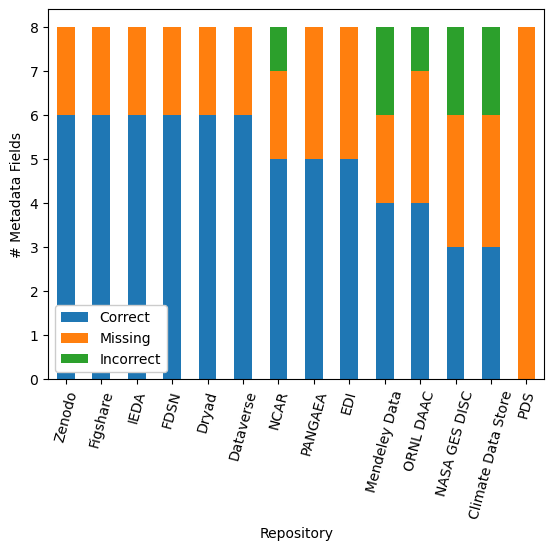

In [9]:
# Count the correct , incorrect, missing fields - Export Only
count_fields(repo_recommended_citation, ex_cols,'ex')

# How many repositories specify citation style?

num_repo_citation_style = len(repo_recommended_citation[repo_recommended_citation['Citation-style']=='APA'])
print(str(num_repo_citation_style)+' repositories specify a citation style (APA).')

# Create a stacked bar graph with correct, incorrect, missing fields for each repository

## Sort df by most correct fields
repo_recommended_citation_sort = repo_recommended_citation.sort_values(['count_correct_ex'], ascending = False)

## Start graphing
ax = repo_recommended_citation_sort.plot.bar(x = 'Repository', y = ['count_correct_ex','count_missing_ex','count_incorrect_ex'], stacked = True, label = ['Correct', 'Missing','Incorrect'])
plt.ylabel('# Metadata Fields')
plt.xticks(rotation = 75)
ax.legend(loc = 'lower left',framealpha=1)

# need to adjust colors, font sizes, rotation of x labels, graph shape, etc.

# Graph correct fields across all repositories
* For each reference manager, what are the # of correct fields across all repositories?

This can be done for either the import or export fields.


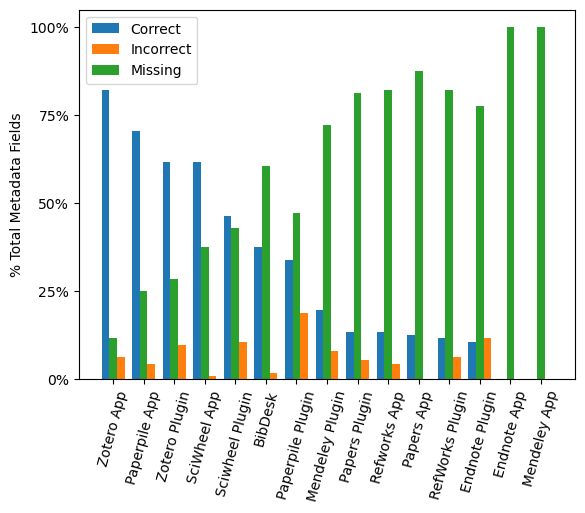

In [17]:
# Must exclude crosscite for import

list_of_dfs = (zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin, sciwheel_wizard, 
             endnote_plugin, endnote_wizard, papers_plugin,papers_wizard,paperpile_plugin,paperpile_wizard,mendeley_plugin,
               mendeley_wizard,refworks_plugin,refworks_wizard)

# Get list of reference-manager-filename indices to add to repo-import-sums-df
list_of_indices = reference_manager_filenames[2:7]+reference_manager_filenames[8:-1]



repo_import_sums = sum_across_repos(list_of_dfs, im_cols, 'im')

repo_import_sums_df = pd.DataFrame(data = repo_import_sums, index = list_of_indices, columns = ['sum_incorrect', 'sum_missing', 'sum_correct'])
repo_import_sums_df_sort = repo_import_sums_df.sort_values(by=['sum_correct'],ascending = False)



# Make graph 

fig, ax = plt.subplots()
x = np.arange(len(list_of_dfs)) # of reference managers
y = 14*8 # Max value possible for repo_export_sums for each ref manager. 14 repos, 8 fields per repo

# Get xlabels from index and fix them up
xlabels = repo_import_sums_df_sort.index.str.replace('-',' ') # Use labels from repo_import_sums_df_SORT index and remove hyphen
xlabels = xlabels.str.replace('wizard','App') # change wizard to App
xlabels = xlabels.str.replace('plugin','Plugin') # fix capitalization

ylabels = ['0%','25%','50%','75%','100%']

offset = 0.25
width = 0.25

# to get percentages: df[sum_column]/y*100

# Graph all
ax.bar(x - offset, (repo_import_sums_df_sort['sum_correct']/y*100), width = width, label = 'Correct')
ax.bar(x + offset, (repo_import_sums_df_sort['sum_incorrect']/y*100), width = width, label = 'Incorrect')
ax.bar(x, (repo_import_sums_df_sort['sum_missing']/y*100), width = width, label = 'Missing')

# set labels and ticks and axes
ax.set_xticks(x,xlabels, rotation = 75) # Either use repo_import_sums_df_sort.index for labels or new string, 'labels'
ax.set_yticks([0,25,50,75,100],ylabels) # Either [0,y/4,y/2,3*y/4,y] for raw # metadata fields or [0, 25, 50, 100] for %
ax.set_ylabel('% Total Metadata Fields')
ax.legend()

plt.show()

# Bibtex
* How many repositories offer Bibtex exports and in what formats?
* Are Bibtex fields correct? 

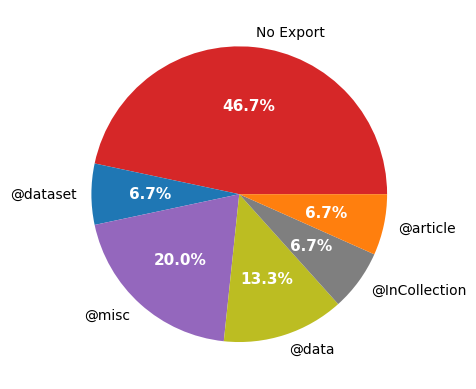

[7, 1, 3, 2, 1, 1]


In [49]:
# First how many repos offer Bibtex exports

# Count whether there is a bibtex export or not

# no bibtex
sum_no_bibtex = np.sum(bibtex['export-exists'].isna())
sum_bibtex = len(bibtex['export-exists'])-sum_no_bibtex

# Filter by type
bibtex_na = bibtex[bibtex['export-exists'].isna()]
bibtex_dataset = bibtex[bibtex['export-file-type'].str.contains('dataset', na=False)]
bibtex_misc = bibtex[bibtex['export-file-type'].str.contains('misc', na=False)]
bibtex_data = bibtex[bibtex['export-file-type'].str.contains('data', na=False)]
bibtex_incoll = bibtex[bibtex['export-file-type'].str.contains('incollection', na=False)]
bibtex_article = bibtex[bibtex['export-file-type'].str.contains('article', na=False)]


# # bar chart for bibtex or NO
# fig, ax = plt.subplots()
# ax.bar([1,2], [sum_bibtex, sum_no_bibtex], label = 'Correct')

labels = ['No Export','@dataset','@misc','@data','@InCollection','@article']
sizes = [len(bibtex_na['export-exists']), len(bibtex_dataset['export-exists']),len(bibtex_misc['export-exists']),
         len(bibtex_data['export-exists']),len(bibtex_incoll['export-exists']),len(bibtex_article['export-exists'])]
colors = ['tab:red','tab:blue','tab:purple','tab:olive','tab:grey','tab:orange']

# Plot pie chart
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)

# set inside label parameters: color, size, weight
# Color = white
for autotext in autotexts: 
    autotext.set_color('white')

# weight and size
plt.setp(autotexts, size=11, weight = 'bold')
    
# show graph
plt.show()

print(sizes)

In [50]:
test = bibtex[bibtex['export-file-type'].str.contains('data', na=False)]


,Repository,DOI,Data-or-software,export-exists,export-file-type,import-meta-type,import-meta-authors,import-meta-title,import-meta-date,import-meta-DOI,import-meta-repo,import-meta-version,import-meta-access-date,count_incorrect_im,count_missing_im,count_correct_im
0,Zenodo,https://doi.org/10.5281/zenodo.10525458,Data,0.0,dataset,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,2,6.0
1,Figshare,https://doi.org/10.6084/m9.figshare.21810366.v7,Data,0.0,article,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,2,5.0
2,PDS,https://doi.org/10.17189/1522849,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8,0.0
3,IEDA,https://doi.org/10.26022/IEDA/112300,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8,0.0
4,NCAR,https://doi.org/10.5065/MM6J-9282,Data,0.0,misc,1.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,3,4.0
5,NASA GES DISC,https://doi.org/10.5067/OMPS/OMPS_N20_NMSO2_PC...,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8,0.0
6,FDSN,https://doi.org/10.7914/SN/ZZ_2019,Data,0.0,misc,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,2,5.0
7,Mendeley Data,https://doi.org/10.17632/4dyn8f8srx.2,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8,0.0
8,PANGAEA,https://doi.org/10.1594/PANGAEA.956157,Data,0.0,incollection,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,2,5.0
9,EDI,https://doi.org/10.6073/pasta/1083a3edf864fbae...,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8,0.0


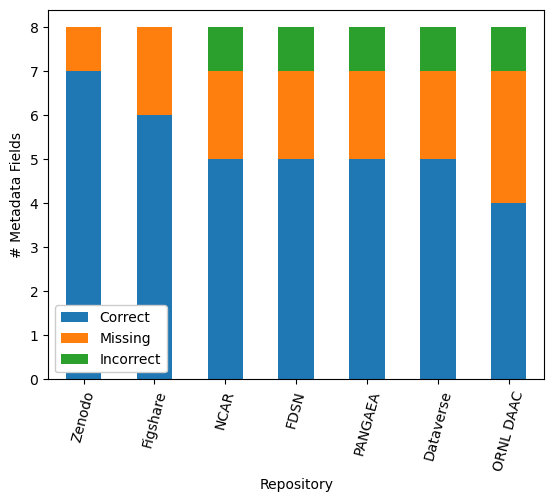

In [12]:
# Count the correct , incorrect, missing fields - Import Only
count_fields(bibtex, im_cols,'im')

# Filter by only repos offering bibtex export, sort, Graph
ax2 = bibtex.loc[bibtex['export-exists']==0.0].sort_values(by=['count_correct_im'],ascending = False).plot.bar(x = 'Repository', y = ['count_correct_im','count_missing_im','count_incorrect_im'], stacked = True, label = ['Correct', 'Missing','Incorrect'])
plt.ylabel('# Metadata Fields')
ax2.legend(loc = 'lower left',framealpha=1)
ax2.set_xticks(np.arange(7), labels = bibtex['Repository'].loc[bibtex['export-exists']==0],rotation=75)
plt.show()

# Best Repository Citation Metadata

* are there any repositories that are performing exceptionally well across reference managers?

Use import data and sum across sheets - how many '0s'. 


Could also break out the 8 metadata fields on a by-repository basis and count across the sheets for a single repository for each field, but this would be pretty challenging to graph

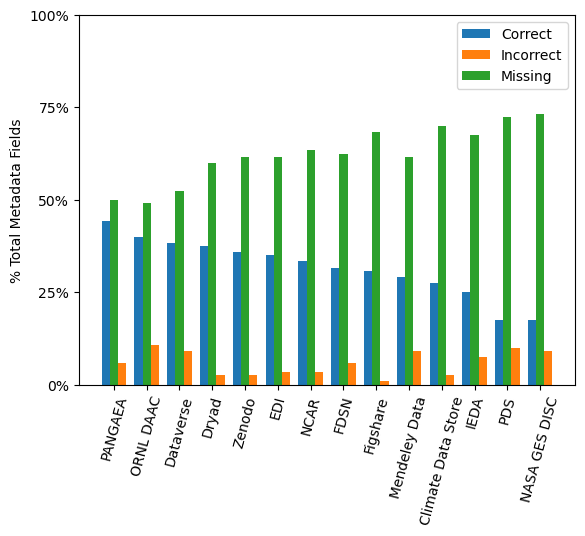

In [13]:
# Must exclude crosscite for import

list_of_dfs = (zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin, sciwheel_wizard, 
               endnote_wizard, endnote_plugin, papers_plugin,papers_wizard,paperpile_plugin,paperpile_wizard,mendeley_plugin,
               mendeley_wizard,refworks_wizard, refworks_plugin)

# Get repository metadata field sums across reference managers
refman_import_sums = sum_across_refmans(list_of_dfs, im_cols, 'im')


# Set labels
ylabels = ['0%','25%','50%','75%','100%']

# Sort values
refman_import_sums_sort = refman_import_sums.sort_values(by=['sum_correct_im'],ascending = False)

# Make graph
fig, ax = plt.subplots()
x = np.arange(14)

y = len(list_of_dfs)*8 # Max value possible for refman_sums for each ref manager

# Percents are df[sum_column]/y*100

offset = 0.25
width = 0.25
ax.bar(x - offset, (refman_import_sums_sort['sum_correct_im']/y*100), width = width, label = 'Correct')
ax.bar(x + offset, (refman_import_sums_sort['sum_incorrect_im']/y*100), width = width, label = 'Incorrect')
ax.bar(x, (refman_import_sums_sort['sum_missing_im']/y*100), width = width, label = 'Missing')

# set labels and ticks and axes
ax.set_xticks(x,refman_import_sums_sort['Repository'], rotation = 75) # Use Repository column
ax.set_yticks([0,(y/y)/4*100,(y/y)/2*100,3*(y/y)/4*100,y/y*100],ylabels)
ax.set_ylabel('% Total Metadata Fields')
ax.legend()

plt.show()

# Most common errors by metadata field

* by import
* by export



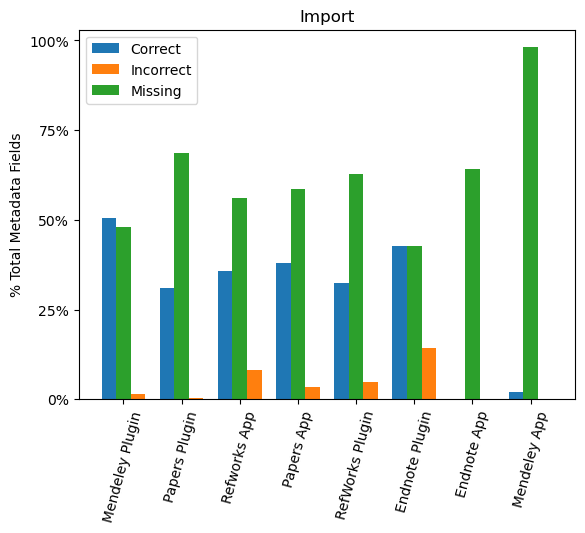

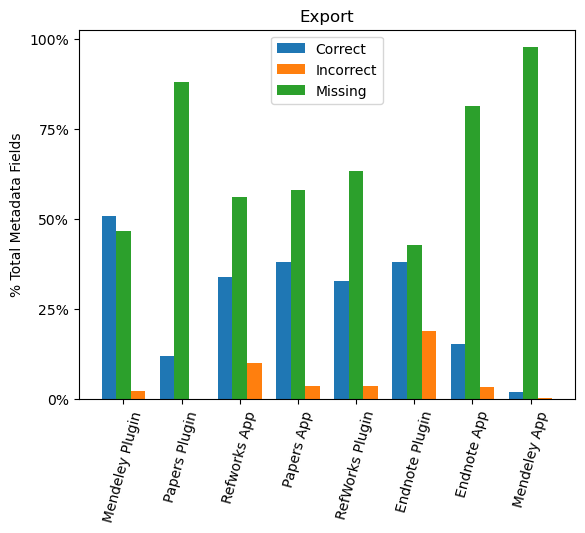

In [14]:
# list dfs to include

# should NOT include cross cite? 

list_of_dfs = (zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin, sciwheel_wizard, endnote_wizard, endnote_plugin, 
               papers_plugin,papers_wizard,paperpile_plugin,paperpile_wizard,mendeley_plugin,
               mendeley_wizard,refworks_wizard, refworks_plugin)

# Get df with sum incorrect, missing, and correct for each metadata field by import and export

store_data = sum_across_fields(list_of_dfs) 

# store_data_sort = store_data.sort_values(by=['sum_correct'],ascending = False)


#print(store_data)

# For both export and import, graph as a stack correct, incorrect, missing for each metadata field

# Common parameters for graphing

x = np.arange(8) # of metadata fields
y = len(list_of_dfs)*len(zotero_plugin['Repository']) # total possible correct fields, len list of dfs * 14 repositories

## Start graphing IMPORT 
fig, ax = plt.subplots()

offset = 0.25
width = 0.25
ax.bar(x - offset, (store_data.loc['import-meta-DOI':'import-meta-version']['sum_correct']/y*100), width = width, label = 'Correct')
ax.bar(x + offset, (store_data.loc['import-meta-DOI':'import-meta-version']['sum_incorrect']/y*100), width = width, label = 'Incorrect')
ax.bar(x, (store_data.loc['import-meta-DOI':'import-meta-version']['sum_missing']/y*100), width = width, label = 'Missing')

# set labels and ticks and axes
ax.set_xticks(x,xlabels[7:15], rotation = 75) # Use xlabels or index
ax.set_yticks([0,(y/y)/4*100,(y/y)/2*100,3*(y/y)/4*100,y/y*100],ylabels)
ax.set_ylabel('% Total Metadata Fields')
ax.legend()
plt.title('Import')

plt.show()

## Start graphing EXPORT 
fig, ax = plt.subplots()

offset = 0.25
width = 0.25
ax.bar(x - offset, (store_data.loc['export-meta-DOI':'export-meta-version']['sum_correct']/y*100), width = width, label = 'Correct')
ax.bar(x + offset, (store_data.loc['export-meta-DOI':'export-meta-version']['sum_incorrect']/y*100), width = width, label = 'Incorrect')
ax.bar(x, (store_data.loc['export-meta-DOI':'export-meta-version']['sum_missing']/y*100), width = width, label = 'Missing')

# set labels and ticks and axes
ax.set_xticks(x,xlabels[7:15], rotation = 75) # Use xlabels or index
ax.set_yticks([0,(y/y)/4*100,(y/y)/2*100,3*(y/y)/4*100,y/y*100],ylabels)
ax.set_ylabel('% Total Metadata Fields')
ax.legend()
plt.title('Export')

plt.show()


In [15]:
print(y)

210


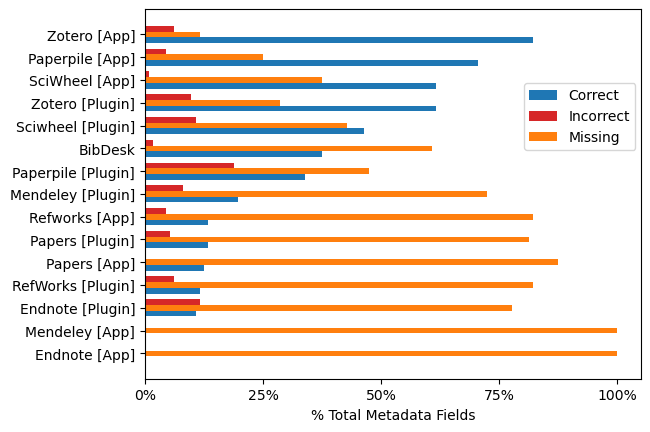

In [46]:

# Must exclude crosscite for import

list_of_dfs = (zotero_plugin,zotero_wizard,bib_desk,sciwheel_plugin, sciwheel_wizard, 
             endnote_plugin, endnote_wizard, papers_plugin,papers_wizard,paperpile_plugin,paperpile_wizard,mendeley_plugin,
               mendeley_wizard,refworks_plugin,refworks_wizard)

# Get list of reference-manager-filename indices to add to repo-import-sums-df
list_of_indices = reference_manager_filenames[2:7]+reference_manager_filenames[8:-1]



repo_import_sums = sum_across_repos(list_of_dfs, im_cols, 'im')

repo_import_sums_df = pd.DataFrame(data = repo_import_sums, index = list_of_indices, columns = ['sum_incorrect', 'sum_missing', 'sum_correct'])
repo_import_sums_df_sort = repo_import_sums_df.sort_values(by=['sum_correct'],ascending = True)



# Make graph 

fig, ax = plt.subplots()
x = np.arange(len(list_of_dfs)) # of reference managers
y = 14*8 # Max value possible for repo_export_sums for each ref manager. 14 repos, 8 fields per repo

# Get xlabels from index and fix them up
xlabels = repo_import_sums_df_sort.index.str.replace('-',' ') # Use labels from repo_import_sums_df_SORT index and remove hyphen
xlabels = xlabels.str.replace('wizard','[App]') # change wizard to App
xlabels = xlabels.str.replace('plugin','[Plugin]') # fix capitalization

ylabels = ['0%','25%','50%','75%','100%']

offset = 0.25
width = 0.25

# to get percentages: df[sum_column]/y*100

# Graph all
ax.barh(x - offset, (repo_import_sums_df_sort['sum_correct']/y*100), width, label = 'Correct', color = 'tab:blue')
ax.barh(x + offset, (repo_import_sums_df_sort['sum_incorrect']/y*100),width, label = 'Incorrect', color = 'tab:red')
ax.barh(x, (repo_import_sums_df_sort['sum_missing']/y*100), width,label = 'Missing', color = 'tab:orange')

# set labels and ticks and axes
ax.set_yticks(x,xlabels, rotation = 0) # Either use repo_import_sums_df_sort.index for labels or new string, 'labels'
ax.set_xticks([0,25,50,75,100],ylabels) # Either [0,y/4,y/2,3*y/4,y] for raw # metadata fields or [0, 25, 50, 100] for %
ax.set_xlabel('% Total Metadata Fields')
ax.legend(bbox_to_anchor=(0.75, 0.6))

plt.show()
